In [2]:
import os
import pandas as pd

In [ ]:
from distutils.command.clean import clean
import os
import pandas as pd
dir='/home/avinsah/Desktop/final year project/dataset'          #datasets directory
for i in os.listdir(dir):                                             #iteration over the dataset names in the directory 
    f = os.path.join(dir, i)
    df=pd.read_csv(f)
    df.drop(['Result Number'],axis=1,inplace=True)                  #dropping unwanted columns
    df.dropna(inplace=True)                                         #dropping null values
    df.reset_index(inplace = True, drop = True)                      #resetting the index
    df.rename(columns={df.columns[2]:"h-index"},inplace=True)
    name=df.iloc[0][3]
    cleandir="/home/avinsah/Desktop/final year project/cleaned datasets"
    if name+'.csv' in os.listdir(cleandir):
        print(name)
        df.to_csv(f'/home/avinsah/Desktop/final year project/cleaned datasets/{name}.csv', mode='a', index=False, header=False)
    else:
        df.to_csv(f'/home/avinsah/Desktop/final year project/cleaned datasets/{name}.csv',index=False)


In [ ]:
#creating a universities csv file
k=[]
for i in os.listdir("/home/avinsah/Desktop/final year project/cleaned datasets"):
    k.append(i[:-4])
pd.DataFrame({'university':k}).to_csv("universities.csv",index=False)

In [ ]:
def H_index(citation):
    citations=[]
    citation=citation.split(",")
    for i in citation:
        i=i.replace('*','')
        if i.isnumeric():
            citations.append(int(i))
    # sorting in ascending order
    citations.sort()
      
    # iterating over the list
    for i, cited in enumerate(citations):
          
        # finding current result
        result = len(citations) - i
          
        # if result is less than or equal
        # to cited then return result
        if result <= cited:
            return result
           
    return 0

In [11]:
df=pd.read_csv('universities.csv')
df

,university,h-index
0,Indian Institute of Technology Indore,25
1,Indian Institute of Technology Bombay,81
2,Indian Institute of Technology Kanpur,83
3,Indian Institute of Technology Patna,20
4,Indian Institute of Technology Delhi,92
5,Indian Institute of Technology Jammu,6
6,Indian Institute of Technology Mandi,13
7,Indian Institute of Technology Goa,34
8,Indian Institute of Technology Tirupati,15
9,Indian Institute of Technology Dharwad,38


In [69]:

True_df=pd.DataFrame(columns=['university','True value'])
for i in range(len(df['university'])):
    path=df.iloc[i][0]+'.csv'
    d=pd.read_csv(f'/home/avinsah/Desktop/final year project/cleaned datasets/{path}')
    col_name='h-index'
    limit=df.iloc[i][1]
    count = (d[col_name] > limit).sum()
    x=df.iloc[i][0].split('Indian Institute of Technology')
    True_df.loc[i]=[x[1],count]
    

In [71]:
True_df

,university,True value
0,Indore,21
1,Bombay,4
2,Kanpur,0
3,Patna,17
4,Delhi,0
5,Jammu,45
6,Mandi,61
7,Goa,2
8,Tirupati,0
9,Dharwad,0


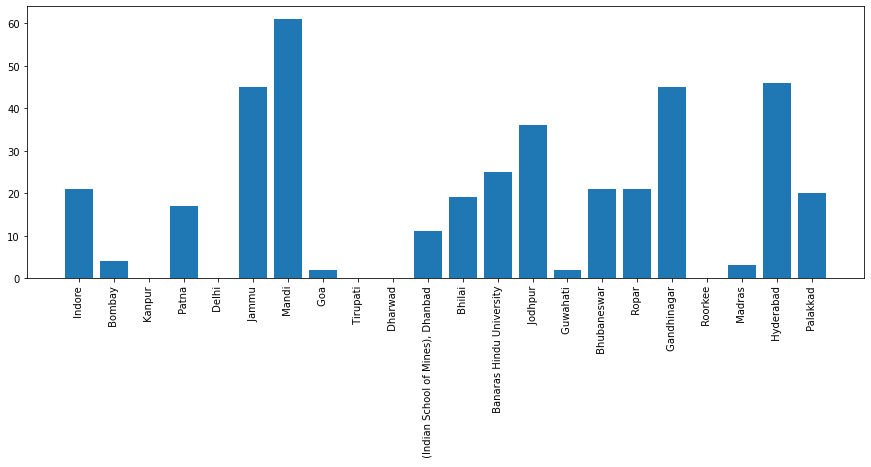

In [89]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15, 5))
plt.bar(True_df.university, True_df['True value'])
plt.xticks(rotation = 90)
plt.show()


In [93]:
rslt_df = True_df.sort_values(by = 'True value', ascending = False)

In [94]:
rslt_df

,university,True value
6,Mandi,61
20,Hyderabad,46
17,Gandhinagar,45
5,Jammu,45
13,Jodhpur,36
12,Banaras Hindu University,25
0,Indore,21
16,Ropar,21
15,Bhubaneswar,21
21,Palakkad,20


In [96]:
df.sort_values(by = 'h-index', ascending = False)

,university,h-index
4,Indian Institute of Technology Delhi,92
19,Indian Institute of Technology Madras,83
2,Indian Institute of Technology Kanpur,83
1,Indian Institute of Technology Bombay,81
18,Indian Institute of Technology Roorkee,61
14,Indian Institute of Technology Guwahati,48
9,Indian Institute of Technology Dharwad,38
7,Indian Institute of Technology Goa,34
10,Indian Institute of Technology (Indian School ...,30
12,Indian Institute of Technology Banaras Hindu U...,26
